In [3]:
import os
import shutil
import random

import pandas as pd
import matplotlib.pyplot as plt
from skimage import io
from spectral import imshow

from tqdm import tqdm

%matplotlib inline

In [4]:
BASEPATH = '../input'

CSVPATH = os.path.join(BASEPATH, 'test_v2_file_mapping.csv')
JPGPATH = os.path.join(BASEPATH, 'test-jpg')
JPGPATH_A = os.path.join(BASEPATH, 'test-jpg-additional')
TIFPATH = os.path.join(BASEPATH, 'test-tif-v2')

FIXEDPATH = os.path.join(BASEPATH, 'test-tif-v2-fixed')

In [5]:
def copy_and_rename(num_files=None):
    '''Copy up to `num_files` images to the scratch directory.
    `num_files` is needed because you can only write a few hundred
    megabytes in this kernel environment. Use the `df -h` command
    to check.
    
    This is a purposely non-destructive operation. You'll need to
    move the renamed files back to the test-tif-v2 directory so
    that your existing scripts will continue to work.
    '''
    n = 0

    if not os.path.exists(FIXEDPATH):
        os.mkdir(FIXEDPATH)

    for index, row in tqdm(df.iterrows(), total=df.shape[0]):
        old = os.path.join(TIFPATH, row['old'])
        new = os.path.join(FIXEDPATH, row['new'])
        shutil.copy(old, new)
#         n += 1
#         if n % 500 == 0:
#             print('Copied {}'.format(n))
#         # Remove the following lines to unleash the full power of
#         # this kernel and copy & rename all the misnamed tif files!
#         if n == num_files:
#             print('Copied {} files as requested'.format(n))
#             break

In [6]:
df = pd.read_csv(CSVPATH)

In [7]:
df

,old,new
0,file_4158.tif,file_18830.tif
1,file_1668.tif,file_19164.tif
2,file_2411.tif,file_15749.tif
3,file_16047.tif,file_7531.tif
4,file_1271.tif,file_18347.tif
5,file_5652.tif,file_11838.tif
6,file_15144.tif,file_2349.tif
7,file_4714.tif,file_7479.tif
8,file_16364.tif,file_6613.tif
9,file_4974.tif,file_16062.tif


In [8]:
def load_img(fname, tifpath, jpgpath):
    # Load the tif and extract the blue, green and red bands
    # (the bands are ordered by wavelength, the way Landsat
    # bands are). Then re-order the arrays so that we can
    # view them in the standard RGB band combination.
    if 'tif' in fname:
        path = os.path.join(tifpath, fname)
        img = io.imread(path)
        bgr = img[:,:,:3]
        rgb = bgr[:, :, [2,1,0]]
        return rgb
    else:
        path = os.path.join(jpgpath, fname)
        img = io.imread(path)
        return img


def show_img(fname, tifpath=TIFPATH, jpgpath=JPGPATH):
    img = load_img(fname, tifpath, jpgpath)

    # use spectral to view tif files
    if 'tif' in fname:
        imshow(img)
    # otherwise use standard matplotlib to view jpgs
    else:
        plt.figure()
        plt.imshow(img)

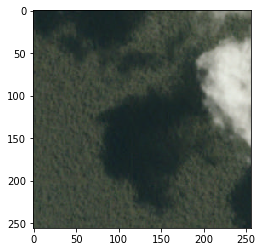

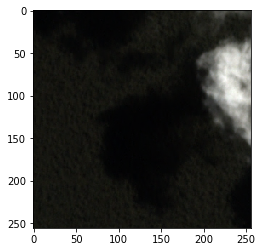

In [9]:
show_img('test_10.jpg')
show_img('test_10.tif')

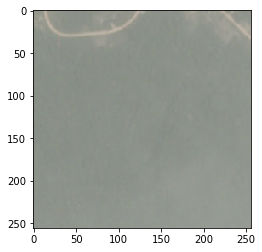

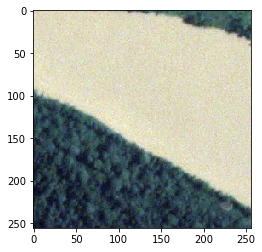

In [10]:
show_img('file_10.jpg', jpgpath=JPGPATH_A)
show_img('file_10.tif')

In [11]:
copy_and_rename()

100%|██████████| 20522/20522 [00:16<00:00, 1249.82it/s]


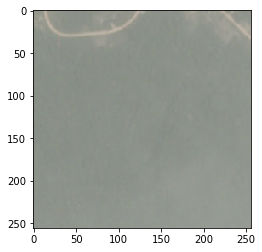

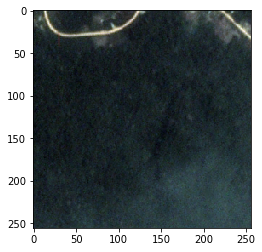

In [12]:
show_img('file_10.jpg', jpgpath=JPGPATH_A)
show_img('file_10.tif', tifpath=FIXEDPATH)

In [13]:
!cp -r ../input/test-tif-v2-fixed/* ../input/test-tif-v2/

In [14]:
!cp -r ../input/test-jpg-additional/* ../input/test-jpg/

In [17]:
print('# File sizes')
for f in os.listdir('../input'):
    if not os.path.isdir('../input/' + f):
        print(f.ljust(30) + str(round(os.path.getsize('../input/' + f) / 1000000, 2)) + 'MB')
    else:
        sizes = [os.path.getsize('../input/'+f+'/'+x)/1000000 for x in os.listdir('../input/' + f)]
        print(f.ljust(30) + str(round(sum(sizes), 2)) + 'MB' + ' ({} files)'.format(len(sizes)))

# File sizes
test-tif-v2                   32100.31MB (61191 files)
train_v2.csv                  1.43MB
train-jpg                     634.68MB (40479 files)
train-tif-v2                  21234.96MB (40479 files)
sample_submission_v2.csv      2.91MB
test-jpg                      958.88MB (61191 files)
test_v2_file_mapping.csv      0.61MB


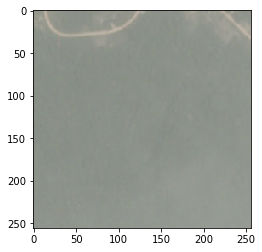

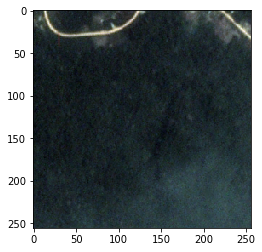

In [18]:
show_img('file_10.jpg', jpgpath=JPGPATH)
show_img('file_10.tif', tifpath=TIFPATH)